In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('salary_data.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

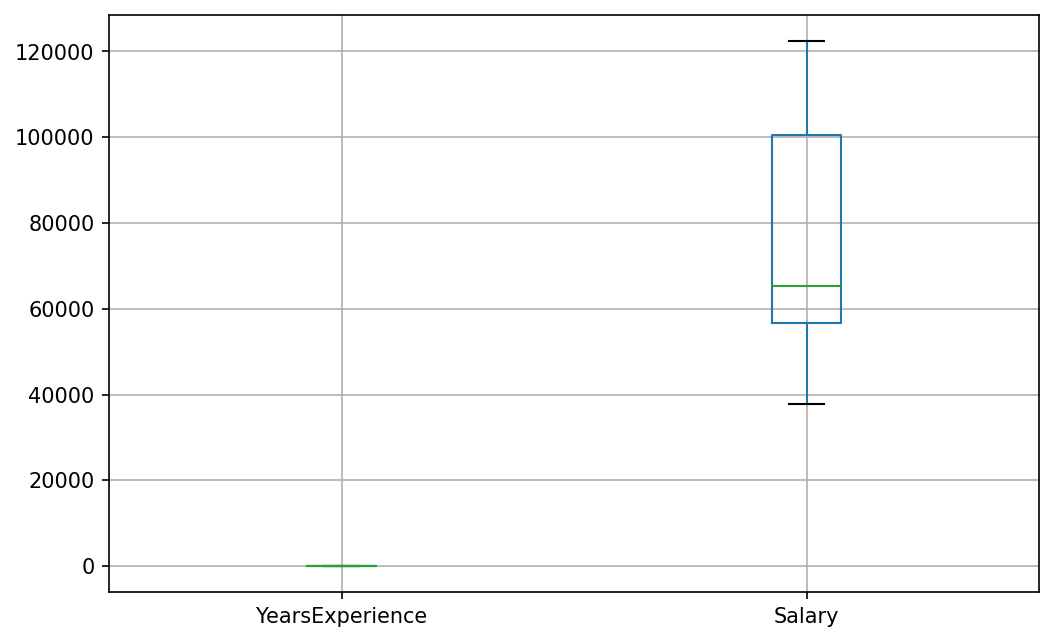

In [7]:
df.boxplot()

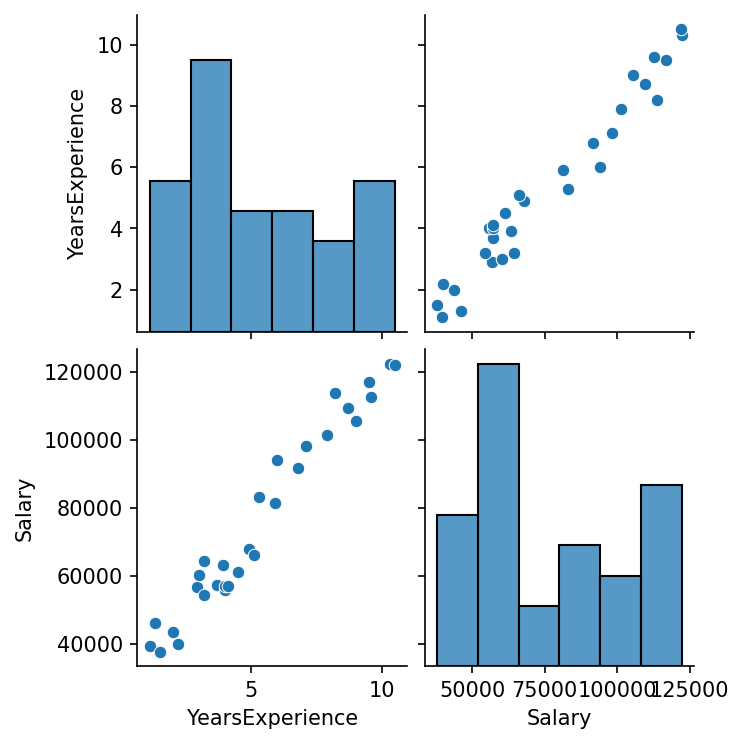

In [8]:
sns.pairplot(df)
plt.show()

<Axes: >

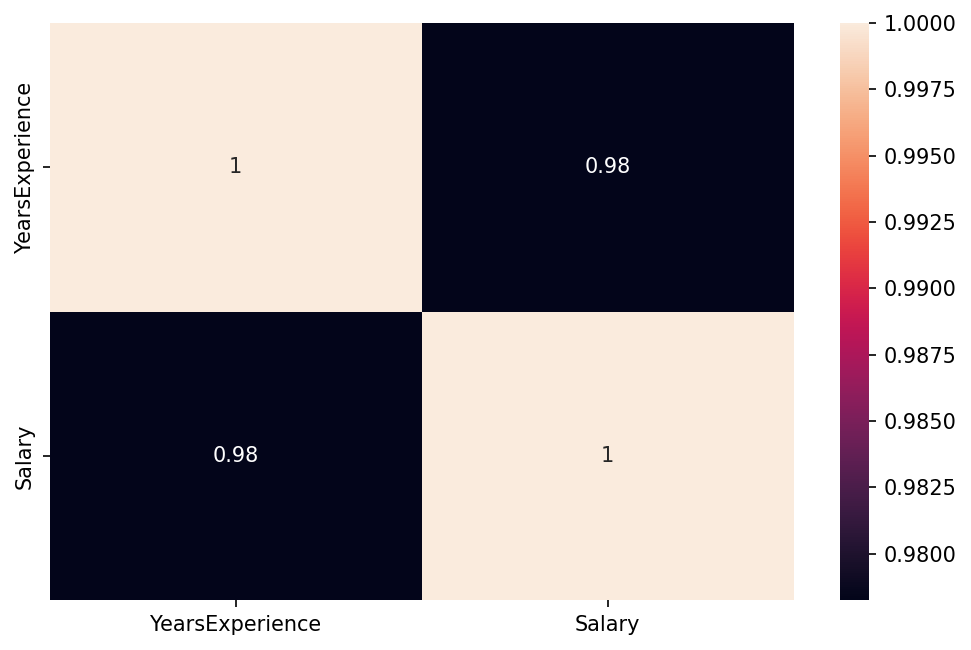

In [9]:
sns.heatmap(df.corr(), annot=True)

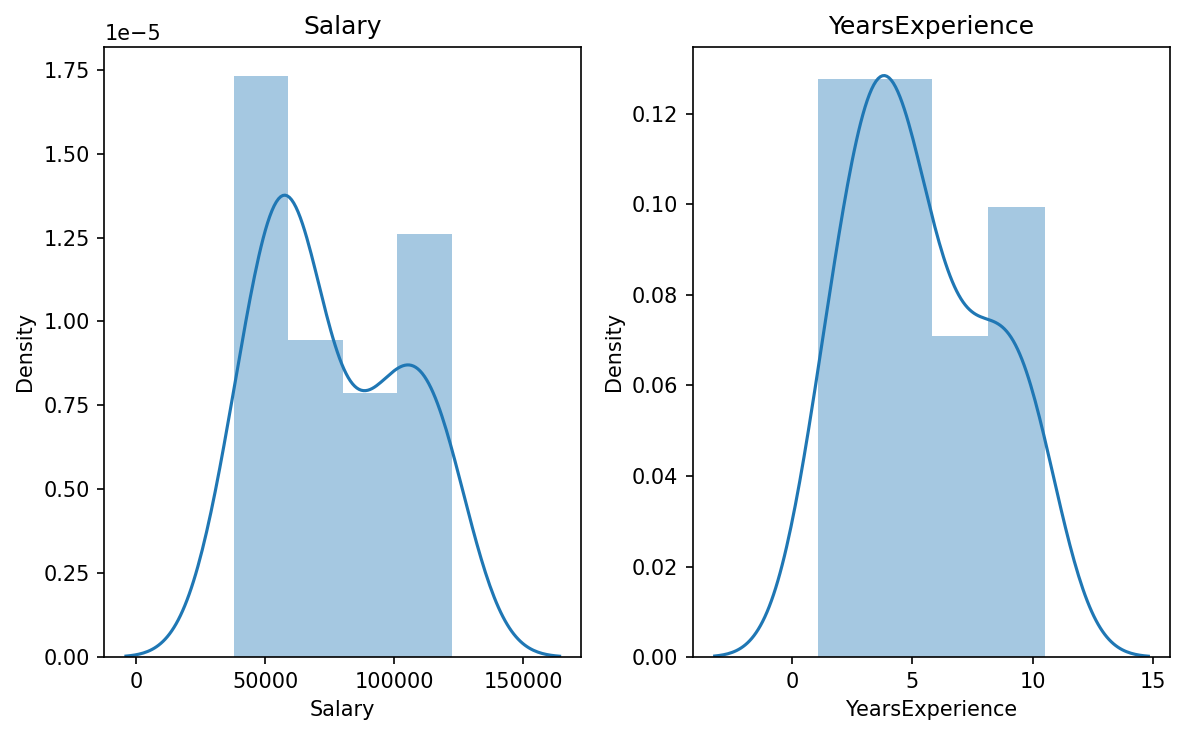

In [10]:
plt.subplot(1,2,1)
sns.distplot(df['Salary'])
plt.title('Salary')

plt.subplot(1,2,2)
sns.distplot(df['YearsExperience'])
plt.title('YearsExperience')

df['Salary'].skew(),df['YearsExperience'].skew()
plt.tight_layout()

* Log Transform

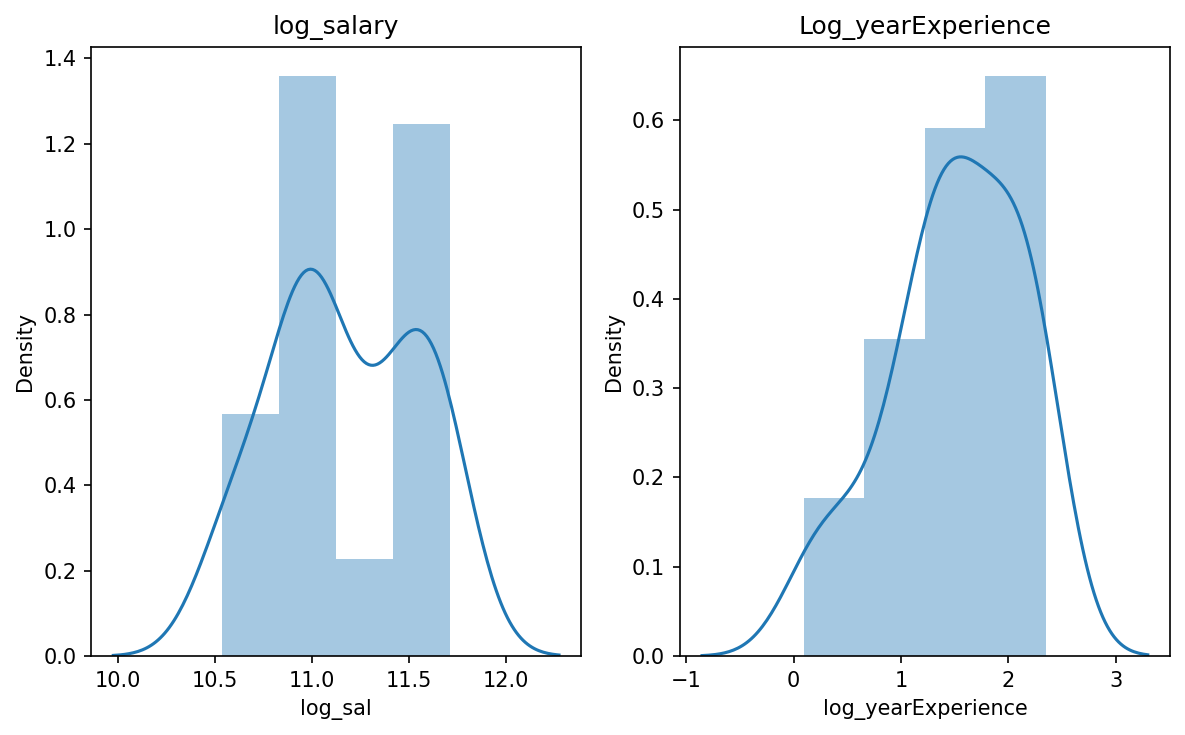

In [11]:
df['log_sal'] = np.log(df['Salary'])
df['log_yearExperience'] = np.log(df['YearsExperience'])


plt.subplot(1,2,1)
sns.distplot(df['log_sal'])
plt.title('log_salary')

plt.subplot(1,2,2)
sns.distplot(df['log_yearExperience'])
plt.title('Log_yearExperience')

df['log_sal'].skew(),df['log_yearExperience'].skew()
plt.tight_layout()

* SQRT Transformation

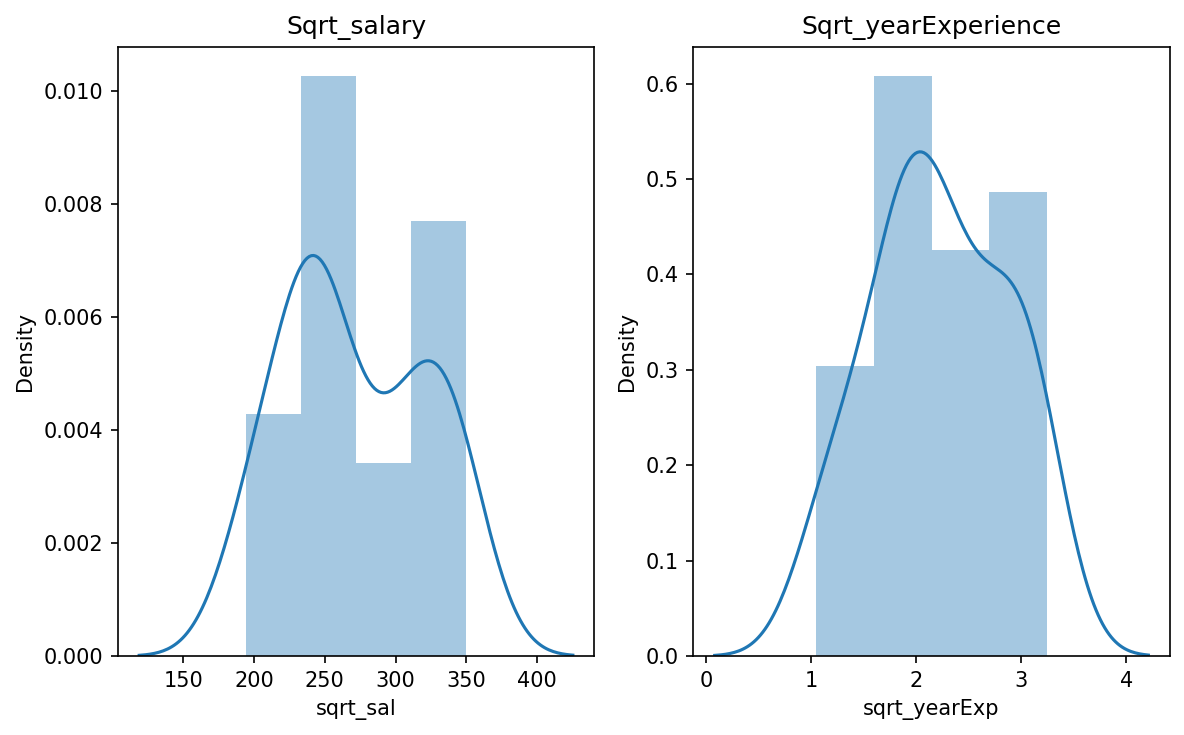

In [12]:
df['sqrt_sal'] = np.sqrt(df['Salary'])
df['sqrt_yearExp'] = np.sqrt(df['YearsExperience'])

plt.subplot(1,2,1)
sns.distplot(df['sqrt_sal'])
plt.title('Sqrt_salary')

plt.subplot(1,2,2)
sns.distplot(df['sqrt_yearExp'])
plt.title('Sqrt_yearExperience')

df['sqrt_sal'].skew(),df['sqrt_yearExp'].skew()
plt.tight_layout()

In [13]:
model = smf.ols('Salary~YearsExperience', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        23:43:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
log_model = smf.ols('log_sal~log_yearExperience', data = df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_sal   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           7.40e-16
Time:                        23:43:17   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3280      0.056    184.868      0.000      10.214      10.442
log_yearExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
sqrt_model = smf.ols('sqrt_sal~sqrt_yearExp', data = df).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sqrt_sal   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           7.58e-19
Time:                        23:43:17   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      103.5680      8.178     12.663      0.000      86.815     120.321
sqrt_yearExp    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* From above comparision we can say that the original data is giving the best accuracy as compared to sqrt or log transformation, so we keep our model fitted on original data set

original data model - accuracy: 95%

log transformed data = sccuracy: 90%

sqrt transfromed data = 94%

In [16]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
print('R squared : ' , model.rsquared)
print('Adj.R squared : ' , model.rsquared_adj)

R squared :  0.9569566641435086
Adj.R squared :  0.9554194021486339


* splitting the data into feature & target columns

In [18]:
x = np.array(df['YearsExperience']).reshape((-1, 1))
y = df['Salary']

In [19]:
x.shape,y.shape

((30, 1), (30,))

* train test split of feature & target variables

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=53)

In [21]:
model = LinearRegression()

In [22]:
model.fit(xtrain,ytrain)

LinearRegression()

In [23]:
ypred = model.predict(xtest)

In [24]:
ypred

array([122128.75552686,  55202.35091078,  37292.46798535, 102333.62176718,
        45776.0967395 , 107046.74885282])

In [25]:
print(f'Train Accuracy : {model.score(xtrain,ytrain) * 100 : .2f}%')
print(f'Test Accuracy : {model.score(xtest,ytest) * 100 : .2f}%')

Train Accuracy :  95.75%
Test Accuracy :  95.01%


In [26]:
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
accuracy = 100*r2_score(ytest,ypred)
print('Mean absolute Error: ',mae)
print('Mean squared Error: ',mse)
print('root Mean squared Error: ',rmse)
print('R squared',r2_score(ytest,ypred))
print('accuracy',accuracy)


Mean absolute Error:  6360.8586160862615
Mean squared Error:  56166790.88070902
root Mean squared Error:  7494.4506723781315
R squared 0.9501154883629506
accuracy 95.01154883629506


# Conclusion :
* model trained by ols method using stats model gave an accuracy of 95%
* model trained using sklearn's linear regression model gave a accuracy of 95%
* overall both model performed well with a slight difference in accuracy for the given data

In [27]:
deli = pd.read_csv('delivery_time.csv')

In [28]:
deli

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [29]:
deli.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [30]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [31]:
deli.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [32]:
deli.rename (columns = {'Delivery Time': 'delivery_time','Sorting Time': 'sorting_time'}, inplace = True)

<Axes: >

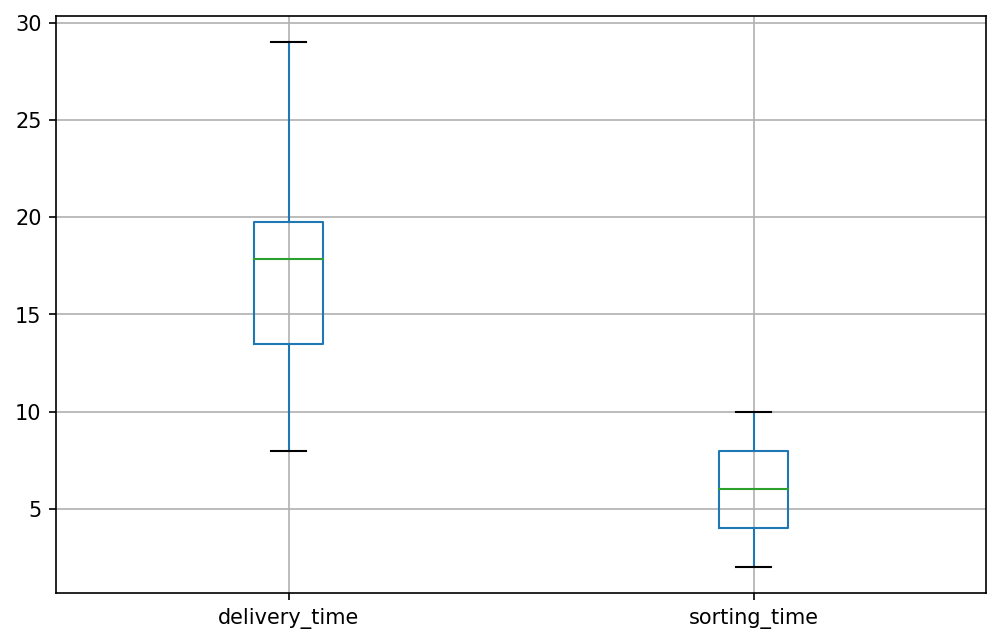

In [33]:
deli.boxplot()

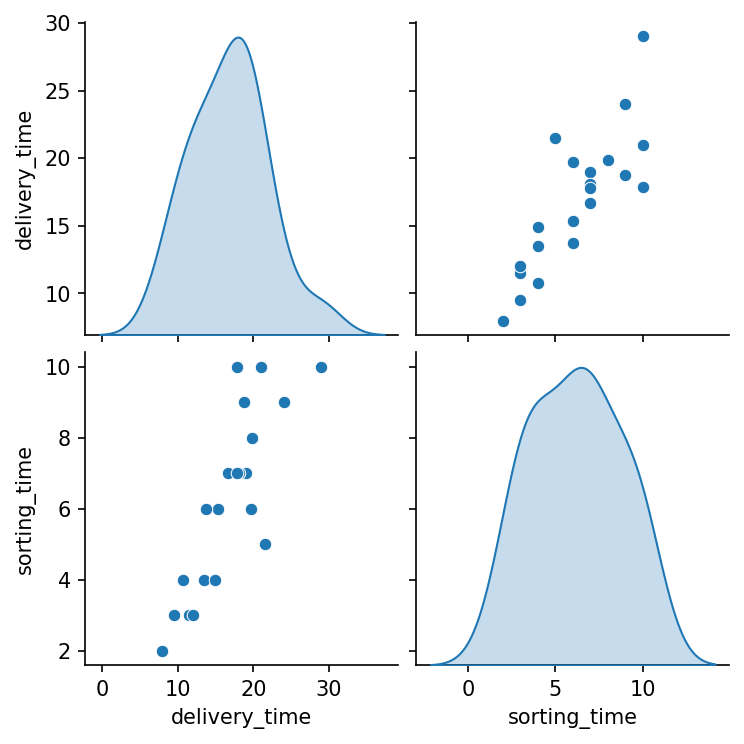

In [34]:
sns.pairplot(deli, diag_kind = 'kde')

<Axes: >

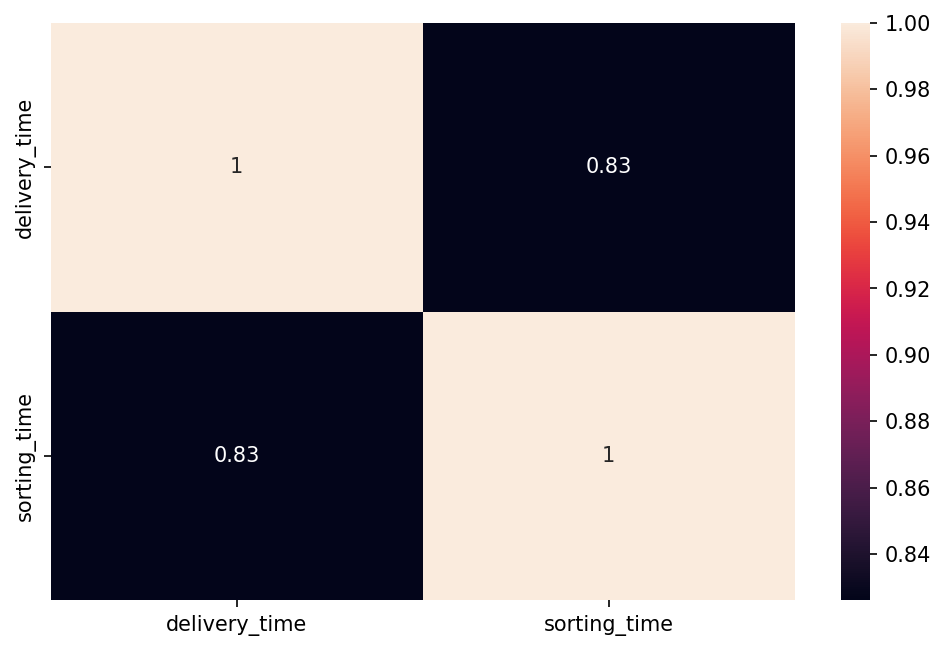

In [35]:
sns.heatmap(deli.corr(), annot = True)

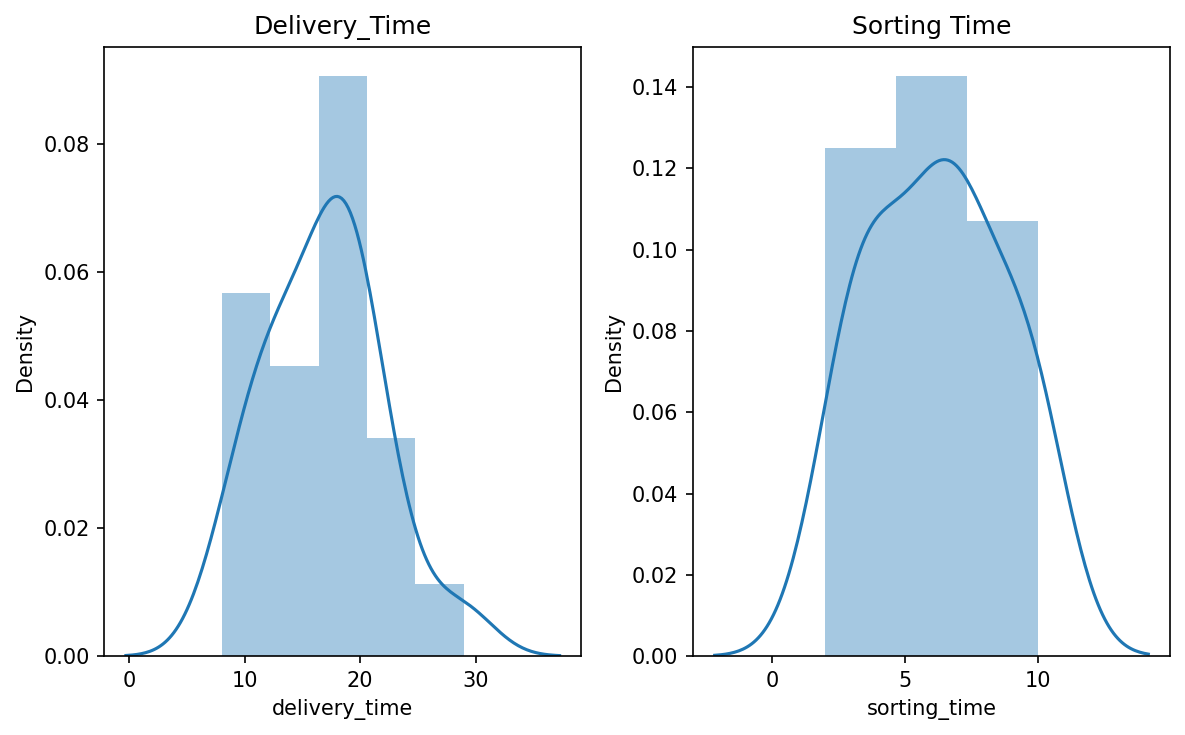

In [36]:
plt.subplot(1,2,1)
sns.distplot(deli['delivery_time'])
plt.title('Delivery_Time')

plt.subplot(1,2,2)
sns.distplot(deli['sorting_time'])
plt.title('Sorting Time')

deli['delivery_time'].skew(),deli['sorting_time'].skew()
plt.tight_layout()

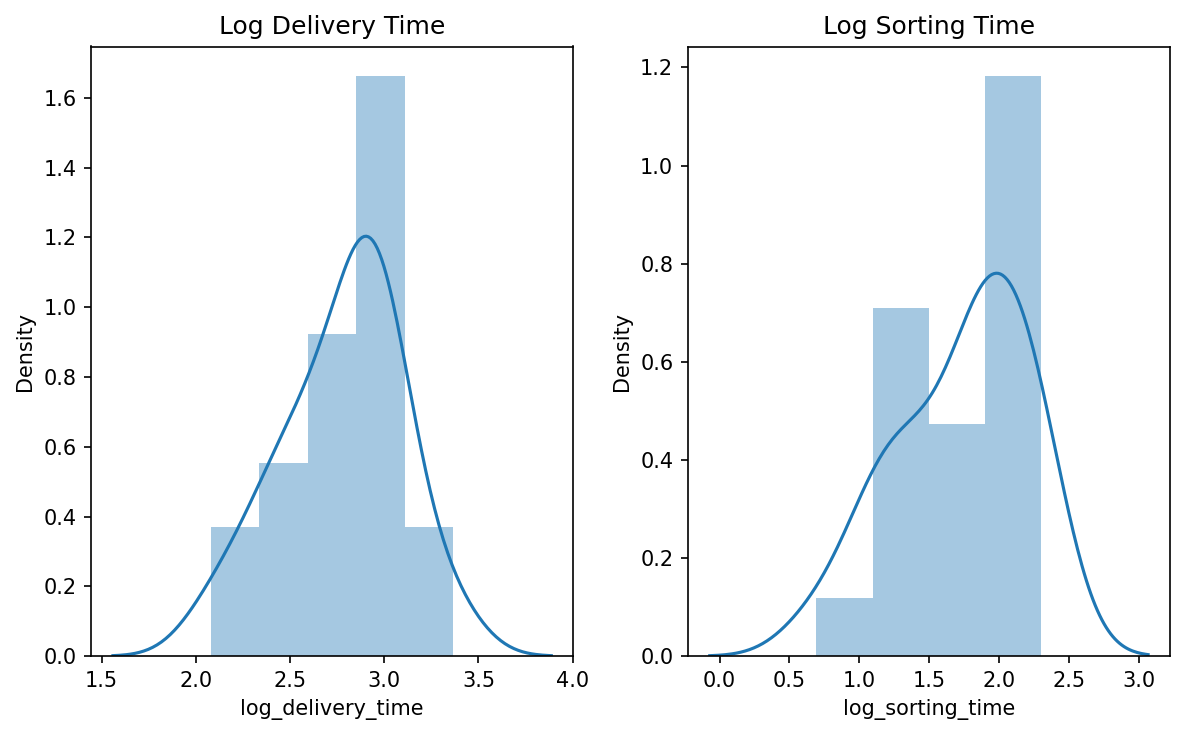

In [37]:
deli['log_delivery_time'] = np.log(deli['delivery_time'])
deli['log_sorting_time'] = np.log(deli['sorting_time'])


plt.subplot(1,2,1)
sns.distplot(deli['log_delivery_time'])
plt.title('Log Delivery Time')

plt.subplot(1,2,2)
sns.distplot(deli['log_sorting_time'])
plt.title('Log Sorting Time')

deli['log_delivery_time'].skew(),deli['log_sorting_time'].skew()
plt.tight_layout()

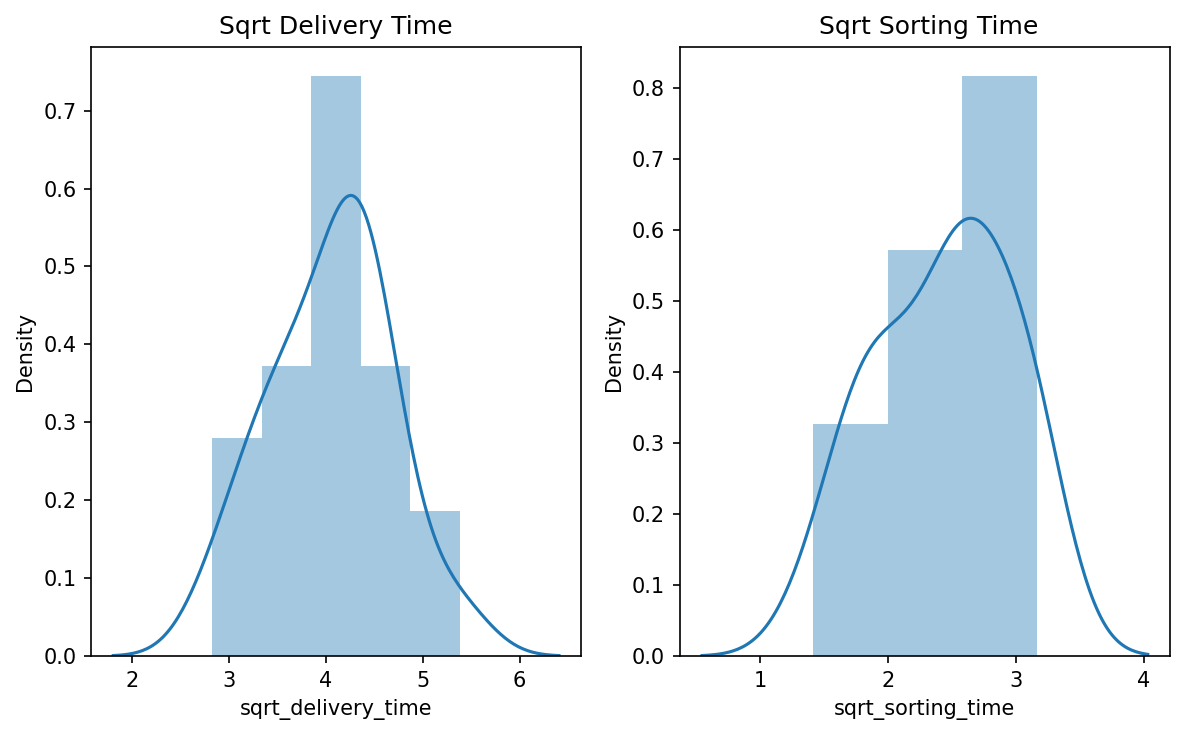

In [38]:
deli['sqrt_delivery_time'] = np.sqrt(deli['delivery_time'])
deli['sqrt_sorting_time'] = np.sqrt(deli['sorting_time'])


plt.subplot(1,2,1)
sns.distplot(deli['sqrt_delivery_time'])
plt.title('Sqrt Delivery Time')

plt.subplot(1,2,2)
sns.distplot(deli['sqrt_sorting_time'])
plt.title(' Sqrt Sorting Time')

deli['sqrt_delivery_time'].skew(),deli['sqrt_sorting_time'].skew()
plt.tight_layout()

In [39]:
model = smf.ols('delivery_time~sorting_time', data = deli).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        23:43:21   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
log_model = smf.ols('log_delivery_time~log_sorting_time', data = deli).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.60e-07
Time:                        23:43:21   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7420      0.133     13.086      0.000       1.463       2.021
log_sorting_time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
sqrt_model = smf.ols('sqrt_delivery_time~sqrt_sorting_time', data = deli).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           8.48e-07
Time:                        23:43:21   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6135      0.349      4.628      0.000       0.884       2.343
sqrt_sorting_time     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* from above comparision we can say that the log transfromed data data is giving the best accuracy as compared to sqrt transformation or original data, so we keep our model fitted on original data set

original data model - accuracy: 68%

log transformed data = sccuracy: 77%

sqrt transfromed data = 73%

In [42]:
log_model.params


Intercept           1.741987
log_sorting_time    0.597522
dtype: float64

In [43]:
print('R squared : ' , log_model.rsquared)
print('Adj.R squared : ' , log_model.rsquared_adj)

R squared :  0.77216134926874
Adj.R squared :  0.7601698413355158


* splitting the data into feature & target columns

In [51]:
x = np.array(deli['log_sorting_time']).reshape((-1,1))
y = deli['log_delivery_time']

* train test split of feature & target variables 


In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x ,y, test_size =0.2, random_state = 53)

In [53]:
model = LinearRegression()

In [54]:
model.fit(xtrain,ytrain)

LinearRegression()

In [55]:
ypred = model.predict(xtest)
ypred

array([3.12638867, 2.90715268, 2.13712178, 2.38634743, 2.56317584])

In [56]:
print(f'Train Accuracy : {model.score(xtrain,ytrain) * 100 : .2f}%')
print(f'Test Accuracy : {model.score(xtest,ytest) * 100 : .2f}%')

Train Accuracy :  67.13%
Test Accuracy :  94.36%


In [57]:
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
accuracy = 100*r2_score(ytest,ypred)
print('Mean absolute Error: ',mae)
print('Mean squared Error: ',mse)
print('root Mean squared Error: ',rmse)
print('R squared',r2_score(ytest,ypred))
print('accuracy',accuracy)

Mean absolute Error:  0.0717317043879481
Mean squared Error:  0.0065161914142563854
root Mean squared Error:  0.08072292991620401
R squared 0.9436315686389685
accuracy 94.36315686389685
